In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as ur
from bbmag import bb_abmag, gettempbb
from tdsat_sensitivity import find_limit, compute_snr
from tdsat_telescope import load_telescope_parameters
from astropy.visualization import quantity_support
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15,10]

In [6]:
# Setup:
td1_band = [193,233]*ur.nm

td2_bandwidth = [40,45,50,55,60,65,70,75,80,85,90,100,120,140,160,180,200]
td2 = []
for w in td2_bandwidth:
    td2.append([260,260+w])
    
td2_band = td2*ur.nm
    
dist = [100,200]*ur.Mpc

# For the shock model after 1 hr:
swiftmag_sh_1hr = -16.5*ur.ABmag
bbtemp_sh_1hr = 36620*ur.K

# For the blue kilonova model after 1 hr:
swiftmag_bk_1hr = -13.5*ur.ABmag
bbtemp_bk_1hr = 16855*ur.K

# Blue kilonova around peak brightness in D1 (t=0.21 days = 5 hr)
swiftmag_bk_max = -14.0*ur.ABmag
bbtemp_bk_max = 10952*ur.K

# Satellite details:
diameter, qe, psf_fwhm, pixel_size, efficiency = load_telescope_parameters(6, diag=True)
outofband_qe = 0.0001
exposure = 300*ur.s
exposure2 = 1000*ur.s

Telescope Configuration 6
Name: Two mini Big Schmidts
Entrance Pupil diameter 21.0 cm
Optical Effifiency 0.5170294784580499
PSF FWHM 2.8810000000000002 arcsec
Pixel size 4.3 arcsec
Effective Aperture 15.1 cm
Effective Area 179.0786352362522 cm2


In [10]:
# Calculate magnitudes in different bands for the shock model:
bbmag_sh = np.zeros([len(td2_band),len(dist),2])
for j in range(0,len(td2_band)):
    for k in range(0,len(dist)):
        bbmag_sh[j,k] = bb_abmag(bbtemp=bbtemp_sh_1hr, bandone=td1_band, 
                                  bandtwo=td2_band[j], swiftmag=swiftmag_sh_1hr, 
                                  dist=dist[k], val=True)
bbmag_sh = bbmag_sh*ur.ABmag

In [7]:
# Same for the blue kilonova at 1 hour:
bbmag_bk_1hr = np.zeros([len(td2_band),len(dist),2])
for j in range(0,len(td2_band)):
    for k in range(0,len(dist)):
        bbmag_bk_1hr[j,k] = bb_abmag(bbtemp=bbtemp_bk_1hr, bandone=td1_band, 
                                  bandtwo=td2_band[j], swiftmag=swiftmag_bk_1hr, 
                                  dist=dist[k], val=True)

bbmag_bk_1hr = bbmag_bk_1hr*ur.ABmag

In [8]:
# Same for the blue kilonova at maximum:
bbmag_bk_max = np.zeros([len(td2_band),len(dist),2])
for j in range(0,len(td2_band)):
    for k in range(0,len(dist)):
        bbmag_bk_max[j,k] = bb_abmag(bbtemp=bbtemp_bk_max, bandone=td1_band, 
                                  bandtwo=td2_band[j], swiftmag=swiftmag_bk_max, 
                                  dist=dist[k], val=True)

bbmag_bk_max = bbmag_bk_max*ur.ABmag

In [12]:
# Calculate signal-to-noise for each band for the shock model (this is quite slow):
snrs_sh = np.zeros([len(td2_band),len(dist),2])
for k in range(len(dist)):
    snrs_sh[:,k,0] = compute_snr(td1_band,bbmag_sh[0,k,0],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
    for j in range(len(td2_band)):
        snrs_sh[j,k,1] = compute_snr(td2_band[j],bbmag_sh[j,k,1],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
        
# Now into magnitude errors:
sigs_sh = 2.5*np.log10(1.+1./snrs_sh)

/Users/mheida/software/miniconda2/envs/envpy3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [13]:
# And for the blue kilonova:
snrs_bk_1hr = np.zeros([len(td2_band),len(dist),2])
for k in range(len(dist)):
    snrs_bk_1hr[:,k,0] = compute_snr(td1_band,bbmag_bk_1hr[0,k,0],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
    for j in range(len(td2_band)):
        snrs_bk_1hr[j,k,1] = compute_snr(td2_band[j],bbmag_bk_1hr[j,k,1],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
            
# Now into magnitude errors:
sigs_bk_1hr = 2.5*np.log10(1.+1./snrs_bk_1hr)

In [14]:
# And for the blue kilonova with longer exposure:
snrs_bk_1hr_1000s = np.zeros([len(td2_band),len(dist),2])
for k in range(len(dist)):
    snrs_bk_1hr_1000s[:,k,0] = compute_snr(td1_band,bbmag_bk_1hr[0,k,0],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure2,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
    for j in range(len(td2_band)):
        snrs_bk_1hr_1000s[j,k,1] = compute_snr(td2_band[j],bbmag_bk_1hr[j,k,1],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure2,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
            
# Now into magnitude errors:
sigs_bk_1hr_1000s = 2.5*np.log10(1.+1./snrs_bk_1hr_1000s)

In [15]:
# Again for the blue kilonova at max:
snrs_bk_max = np.zeros([len(td2_band),len(dist),2])
for k in range(len(dist)):
    snrs_bk_max[:,k,0] = compute_snr(td1_band,bbmag_bk_max[0,k,0],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
    for j in range(len(td2_band)):
        snrs_bk_max[j,k,1] = compute_snr(td2_band[j],bbmag_bk_max[j,k,1],
                                  med_zodi=True,diameter=diameter,
                                  exposure = exposure,
                                  efficiency = efficiency, qe = qe,
                                  outofband_qe = outofband_qe, psf_size = psf_fwhm, pixel_size = pixel_size)
            
# Now into magnitude errors:
sigs_bk_max = 2.5*np.log10(1.+1./snrs_bk_max)

In [18]:
# Get blackbody temperatures and errors:
bbtemp_fit_sh = np.zeros([len(td2_band),len(dist),2])*ur.K
for j in range(len(td2_band)):
    for k in range(len(dist)):
        bbtemp_fit_sh[j,k] = gettempbb(bandone=td1_band, bandtwo=td2_band[j],
                                        magone=bbmag_sh[j,k,0], magtwo=bbmag_sh[j,k,1],
                                        magone_err=sigs_sh[j,k,0]*ur.ABmag,magtwo_err=sigs_sh[j,k,1]*ur.ABmag)

In [20]:
# For the blue kilonova model:
bbtemp_fit_bk_1hr = np.zeros([len(td2_band),len(dist),2])*ur.K
for j in range(len(td2_band)):
    for k in range(len(dist)):
        bbtemp_fit_bk_1hr[j,k] = gettempbb(bandone=td1_band, bandtwo=td2_band[j],
                                    magone=bbmag_bk_1hr[j,k,0], magtwo=bbmag_bk_1hr[j,k,1],
                                    magone_err=sigs_bk_1hr[j,k,0]*ur.ABmag,magtwo_err=sigs_bk_1hr[j,k,1]*ur.ABmag)

In [22]:
# For the blue kilonova model with longer exposure:
bbtemp_fit_bk_1hr_1000s = np.zeros([len(td2_band),len(dist),2])*ur.K
for j in range(len(td2_band)):
    for k in range(len(dist)):
        bbtemp_fit_bk_1hr_1000s[j,k] = gettempbb(bandone=td1_band, bandtwo=td2_band[j],
                                    magone=bbmag_bk_1hr[j,k,0], magtwo=bbmag_bk_1hr[j,k,1],
                                    magone_err=sigs_bk_1hr_1000s[j,k,0]*ur.ABmag,magtwo_err=sigs_bk_1hr_1000s[j,k,1]*ur.ABmag)

In [25]:
# And for the blue kilonova model at max:
bbtemp_fit_bk_max = np.zeros([len(td2_band),len(dist),2])*ur.K
for j in range(len(td2_band)):
    for k in range(len(dist)):
        bbtemp_fit_bk_max[j,k] = gettempbb(bandone=td1_band, bandtwo=td2_band[j],
                                    magone=bbmag_bk_max[j,k,0], magtwo=bbmag_bk_max[j,k,1],
                                    magone_err=sigs_bk_max[j,k,0]*ur.ABmag,magtwo_err=sigs_bk_max[j,k,1]*ur.ABmag,
                                    bbtemp_init=10000)

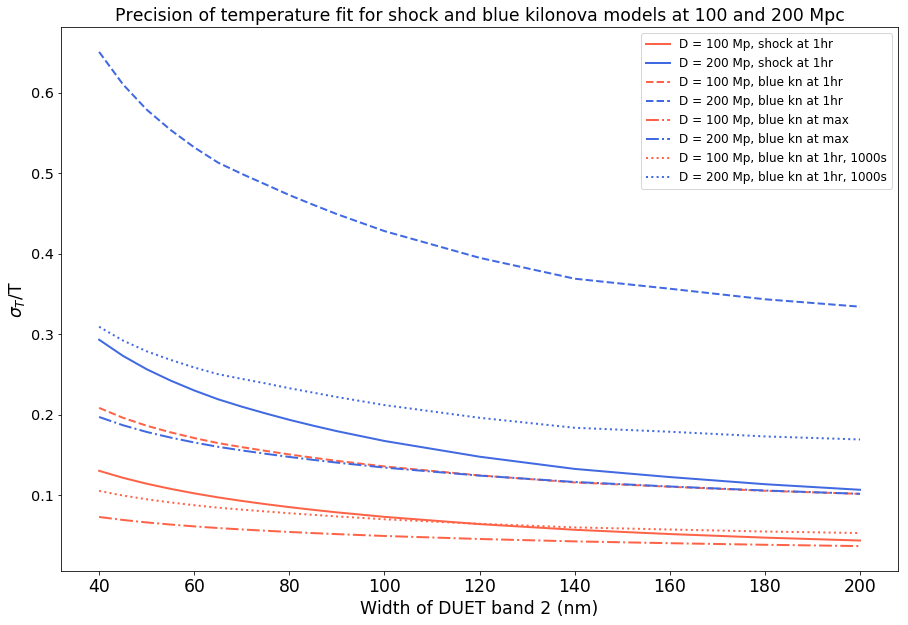

In [30]:
# Plot sigmaT/T as a function of bandwidth for TD2:
with quantity_support():
    plt.plot(td2_bandwidth,bbtemp_fit_sh[:,0,1]/bbtemp_fit_sh[:,0,0],color='tomato',linewidth=2,linestyle='-',label='D = 100 Mp, shock at 1hr')
    plt.plot(td2_bandwidth,bbtemp_fit_sh[:,1,1]/bbtemp_fit_sh[:,1,0],color='royalblue',linewidth=2,linestyle='-',label='D = 200 Mp, shock at 1hr')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_1hr[:,0,1]/bbtemp_fit_bk_1hr[:,0,0],color='tomato',linewidth=2,linestyle='--',label='D = 100 Mp, blue kn at 1hr')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_1hr[:,1,1]/bbtemp_fit_bk_1hr[:,1,0],color='royalblue',linewidth=2,linestyle='--',label='D = 200 Mp, blue kn at 1hr')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_max[:,0,1]/bbtemp_fit_bk_max[:,0,0],color='tomato',linewidth=2,linestyle='-.',label='D = 100 Mp, blue kn at max')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_max[:,1,1]/bbtemp_fit_bk_max[:,1,0],color='royalblue',linewidth=2,linestyle='-.',label='D = 200 Mp, blue kn at max')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_1hr_1000s[:,0,1]/bbtemp_fit_bk_1hr_1000s[:,0,0],color='tomato',linewidth=2,linestyle=':',label='D = 100 Mp, blue kn at 1hr, 1000s')
    plt.plot(td2_bandwidth,bbtemp_fit_bk_1hr_1000s[:,1,1]/bbtemp_fit_bk_1hr_1000s[:,1,0],color='royalblue',linewidth=2,linestyle=':',label='D = 200 Mp, blue kn at 1hr, 1000s')

     
plt.legend(fontsize='large')
plt.xlabel('Width of DUET band 2 (nm)',fontsize='xx-large')
plt.ylabel(r'$\sigma_T$/T',fontsize='xx-large')
#plt.yscale('log')
plt.tick_params(axis='y',which='major',labelsize='x-large')
plt.tick_params(axis='x',which='major',labelsize='xx-large')
plt.title('Precision of temperature fit for shock and blue kilonova models at 100 and 200 Mpc',fontsize='xx-large')
plt.show()